In [1]:
############### Generating AI poetry ###############

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
# Step 1: Pick the lyrics you like

# I will go ahead with "Perfect" by Ed Sheeran

"""
I found a love, for me
Darling, just dive right in and follow my lead
Well, I found a girl, beautiful and sweet
Oh, I never knew you were the someone waiting for me
'Cause we were just kids when we fell in love
Not knowing what it was
I will not give you up this time
But darling, just kiss me slow
Your heart is all I own
And in your eyes, you're holding mine
Baby, I'm dancing in the dark
With you between my arms
Barefoot on the grass
Listening to our favourite song
When you said you looked a mess
I whispered underneath my breath
But you heard it
Darling, you look perfect tonight
Well, I found a woman, stronger than anyone I know
She shares my dreams, I hope that someday I'll share her home
I found a lover, to carry more than just my secrets
To carry love, to carry children of our own
We are still kids, but we're so in love
Fighting against all odds
I know we'll be alright this time
Darling, just hold my hand
Be my girl, I'll be your man
I see my future in your eyes
Baby, I'm dancing in the dark
With you between my arms
Barefoot on the grass
Listening to our favorite song
When I saw you in that dress, looking so beautiful
I don't deserve this
Darling, you look perfect tonight
Baby, I'm dancing in the dark
With you between my arms
Barefoot on the grass
Listening to our favorite song
I have faith in what I see
Now I know I have met an angel in person
And she looks perfect
I don't deserve this
You look perfect tonight
"""

" \nI found a love, for me\nDarling, just dive right in and follow my lead\nWell, I found a girl, beautiful and sweet\nOh, I never knew you were the someone waiting for me\n'Cause we were just kids when we fell in love\nNot knowing what it was\nI will not give you up this time\nBut darling, just kiss me slow\nYour heart is all I own\nAnd in your eyes, you're holding mine\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favourite song\nWhen you said you looked a mess\nI whispered underneath my breath\nBut you heard it\nDarling, you look perfect tonight\nWell, I found a woman, stronger than anyone I know\nShe shares my dreams, I hope that someday I'll share her home\nI found a lover, to carry more than just my secrets\nTo carry love, to carry children of our own\nWe are still kids, but we're so in love\nFighting against all odds\nI know we'll be alright this time\nDarling, just hold my hand\nBe my girl, I'll be your man\nI see my future in

In [14]:
# Step 2: Read the data in the code

# creating tokenizer object
tokenizer = Tokenizer()

data = "I found a love, for me\nDarling, just dive right in and follow my lead\nWell, I found a girl, beautiful and sweet\nOh, I never knew you were the someone waiting for me\n'Cause we were just kids when we fell in love\nNot knowing what it was\nI will not give you up this time\nBut darling, just kiss me slow\nYour heart is all I own\nAnd in your eyes, you're holding mine\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favourite song\nWhen you said you looked a mess\nI whispered underneath my breath\nBut you heard it\nDarling, you look perfect tonight\nWell, I found a woman, stronger than anyone I know\nShe shares my dreams, I hope that someday I'll share her home\nI found a lover, to carry more than just my secrets\nTo carry love, to carry children of our own\nWe are still kids, but we're so in love\nFighting against all odds\nI know we'll be alright this time\nDarling, just hold my hand\nBe my girl, I'll be your man\nI see my future in your eyes\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favorite song\nWhen I saw you in that dress, looking so beautiful\nI don't deserve this\nDarling, you look perfect tonight\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favorite song\nI have faith in what I see\nNow I know I have met an angel in person\nAnd she looks perfect\nI don't deserve this\nYou look perfect tonight"


In [15]:
# Step 3: Creating word index

# converting every letter to lower case and breaking in new lines on '\n'
text = data.lower().split('\n')

# obtaining a word_index
tokenizer.fit_on_texts(text)

# counting the total words in corpus and adding 1 for OOV token
total_words = len(tokenizer.word_index) + 1

print(total_words)


130


In [17]:
# Step 4: Sequencing line by line

# creating sequence empty list
inp_sequences = []

for line in text:
  token_lst = tokenizer.texts_to_sequences([line])[0] # tokenizing each line as it iterates
  for i in range(1, len(token_lst)):
    n_gram_seq = token_lst[:i+1]
    inp_sequences.append(n_gram_seq)

In [18]:
# Step 4: Padding the sequences

# pad sequences
max_seq_len = max([len(x) for x in inp_sequences])
inp_sequences = np.array(pad_sequences(inp_sequences, maxlen=max_seq_len, padding='pre'))

In [22]:
# Step 5: Create features and labels

x, labels = inp_sequences[:,:-1],inp_sequences[:,-1] #slicing the list to generate separate x and y

y = tf.keras.utils.to_categorical(labels, num_classes=total_words) # make y as categorical and one-hot encoded

In [23]:
# Step 6: Create a model

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_fit = model.fit(x, y, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
8/8 [==============================] - 6s 40ms/step - loss: 4.8584 - accuracy: 0.0248
Epoch 2/100
8/8 [==============================] - 0s 41ms/step - loss: 4.7713 - accuracy: 0.0455
Epoch 3/100
8/8 [==============================] - 0s 41ms/step - loss: 4.5738 - accuracy: 0.0455
Epoch 4/100
8/8 [==============================] - 0s 40ms/step - loss: 4.4723 - accuracy: 0.0455
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 4.4335 - accuracy: 0.0579
Epoch 6/100
8/8 [==============================] - 0s 40ms/step - loss: 4.3853 - accuracy: 0.0661
Epoch 7/100
8/8 [==============================] - 0s 42ms/step - loss: 4.3021 - accuracy: 0.0661
Epoch 8/100
8/8 [==============================] - 0s 40ms/step - loss: 4.2255 - accuracy: 0.0537
Epoch 9/100
8/8 [==============================] - 0s 40ms/step - loss: 4.1203 - accuracy: 0.0826
Epoch 10/100
8/8 [==============================] - 0s 41ms/step - loss: 4.0273 - accuracy: 0.0785
Epoch 11/100
8/8 [=

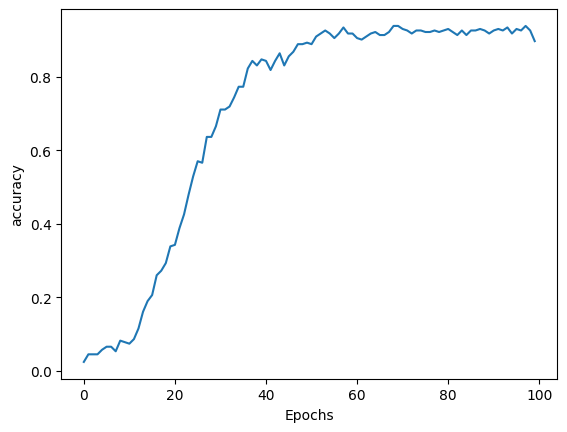

In [26]:
# Step 7: Create epoch vs accuracy graph

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(model_fit, 'accuracy') # the accuracy is about 90%

In [30]:
# Step 8: Validation - We provide an initial text for it to generate some lines for us

initial_text = "I see in your eyes"
next_words = 20

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([initial_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	initial_text += " " + output_word
print(initial_text)

1/1 [==============================] - 0s 81ms/step
I see in your eyes eyes holding mine mine her knowing home home home person person person person person person person person person person person
